In [34]:
## imports

from itertools import tee
import h5py
import numpy as np
import operator
import visualisation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.fft import rfft, rfftfreq
from numpy import load, save
import scipy

plt.rcParams["figure.figsize"] = (16,8)

PATH_TO_TRAINING_DATA = "data/X_train_denoised_array.h5" ## denoised training data
PATH_TO_TRAINING_TARGET = "data/y_train_tX9Br0C.csv"
h5_file = h5py.File(PATH_TO_TRAINING_DATA, 'r') 
mask = np.array(pd.read_csv(PATH_TO_TRAINING_TARGET))
FREQUENCY = 100 ## sampling frequency
NB_DIMENSIONS = 8

In [2]:
WINDOW_SIZE = 5 * FREQUENCY ## 5 seconds for the window

In [3]:
## useful function 

def get_distribution_features(signal: np.ndarray) -> dict:
    res_dict = dict()
    
    res_dict["mean"] = signal.mean()
    res_dict["std"] = signal.std()
    res_dict["min"] = signal.min()
    res_dict["max"] = signal.max()
    res_dict["skew"] = scipy.stats.skew(signal)
    res_dict["quarter"] = np.percentile(signal, 25)
    res_dict["two_quarter"] = np.percentile(signal, 50)
    res_dict["three_quarter"] = np.percentile(signal, 75)
    
    return res_dict

In [81]:
apnea_events = load('data/location_apnea_events.npy')
print(np.shape(apnea_events))
nonapnea_events = load('data/location_nonapnea_events.npy')
print(np.shape(nonapnea_events))

(1486, 3)
(5360, 3)


In [127]:
def features_boxplots(X_train_0, dimension, window_size = WINDOW_SIZE):
    """
    
    Input : the signal corresponding to a dimension of X to be considered (dimension between 0 and 7)
    Parameter window_size : size of each subsignal from which statistical features (mean, variance, ...)
                            are computed
    Output : A dataframe with relevant caracteristics that can be compared between Apnea and NonApnea sleep

    """

    X_apnea = list()
    for a,b,c in apnea_events: 
        a,b,c = int(a), int(b), int(c)
        X_apnea.append(X_train_0[a, b*FREQUENCY:(b+c)*FREQUENCY+1])

    X_nonapnea = list()
    for a,b,c in nonapnea_events: 
        a,b,c = int(a), int(b), int(c)
        X_nonapnea.append(X_train_0[a, b*FREQUENCY:(b+c)*FREQUENCY+1])


    apneas = list()
    for i in range(len(X_apnea)):
        for j in range(len(X_apnea[i])):
            if j%window_size ==0:
                apneas.append(X_apnea[i][j:j+window_size])
    apneas=np.array(apneas)

    nonapneas = list()
    for i in range(len(X_nonapnea)):
        for j in range(len(X_nonapnea[i])):
            if j%window_size ==0:
                nonapneas.append(X_nonapnea[i][j:j+window_size])
    nonapneas=np.array(nonapneas)

    total_size = np.shape(apneas)[0] + np.shape(nonapneas)[0]
    category = list()
    mean, median, std, maxi, mini = np.zeros(total_size), np.zeros(total_size), np.zeros(total_size),np.zeros(total_size), np.zeros(total_size)
    i=0
    for signal in apneas:
        signal = np.array(signal)
        #signal= (signal-min(signal))/(max(signal) - min(signal)) ## normalize
        features = get_distribution_features(signal)
        mean[i] = features["mean"]
        maxi[i] = features["max"]
        mini[i] = features["min"]
        std[i] = features["std"]
        median[i] = features["two_quarter"]
        category.append('Apnea')

        i+=1

    for signal in nonapneas:
        signal = np.array(signal)
        #signal= (signal-min(signal))/(max(signal) - min(signal)) ## normalize
        features = get_distribution_features(signal)
        mean[i] = features["mean"]
        maxi[i] = features["max"]
        mini[i] = features["min"]
        std[i] = features["std"]
        median[i] = features["two_quarter"]
        category.append('Non Apnea')
        i+=1

    category = np.array(category)

    ## construction of a dataframe
    d = {'mean': mean, 'median':median,'maximum' : maxi, 'minimum': mini, 'std': std, 'category':category}
    df_train = pd.DataFrame(data=d)


    ## plots
    fig, axes = plt.subplots(1,len(df_train.columns[:-1]), figsize=(25, 10))
    fig.suptitle('Comparison of statistical distribution of dimension '+ str(dimension) +' of the multivariate time series among Apnea and Non Apnea')
    c=0
    for col in df_train.columns[:-1]:

        sns.boxplot(ax = axes[c], y=col, x='category', data=df_train)
        c+=1
    plt.show()

* Be careful, next cell runs in around 10 minutes

******************************
Study of dimension 0 of the multivariate time series


<ipython-input-127-f0e31c4849ee>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  apneas=np.array(apneas)
<ipython-input-127-f0e31c4849ee>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nonapneas=np.array(nonapneas)


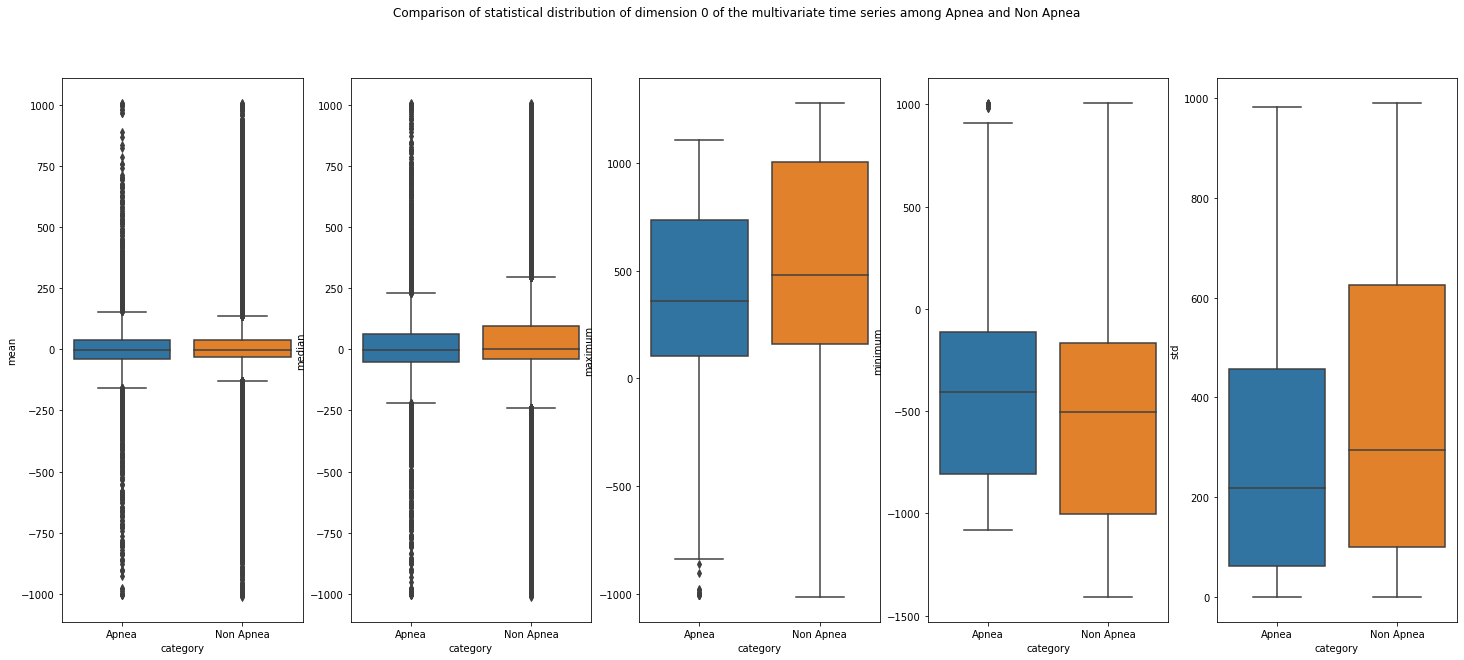


******************************
Study of dimension 1 of the multivariate time series


<ipython-input-127-f0e31c4849ee>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  apneas=np.array(apneas)
<ipython-input-127-f0e31c4849ee>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nonapneas=np.array(nonapneas)


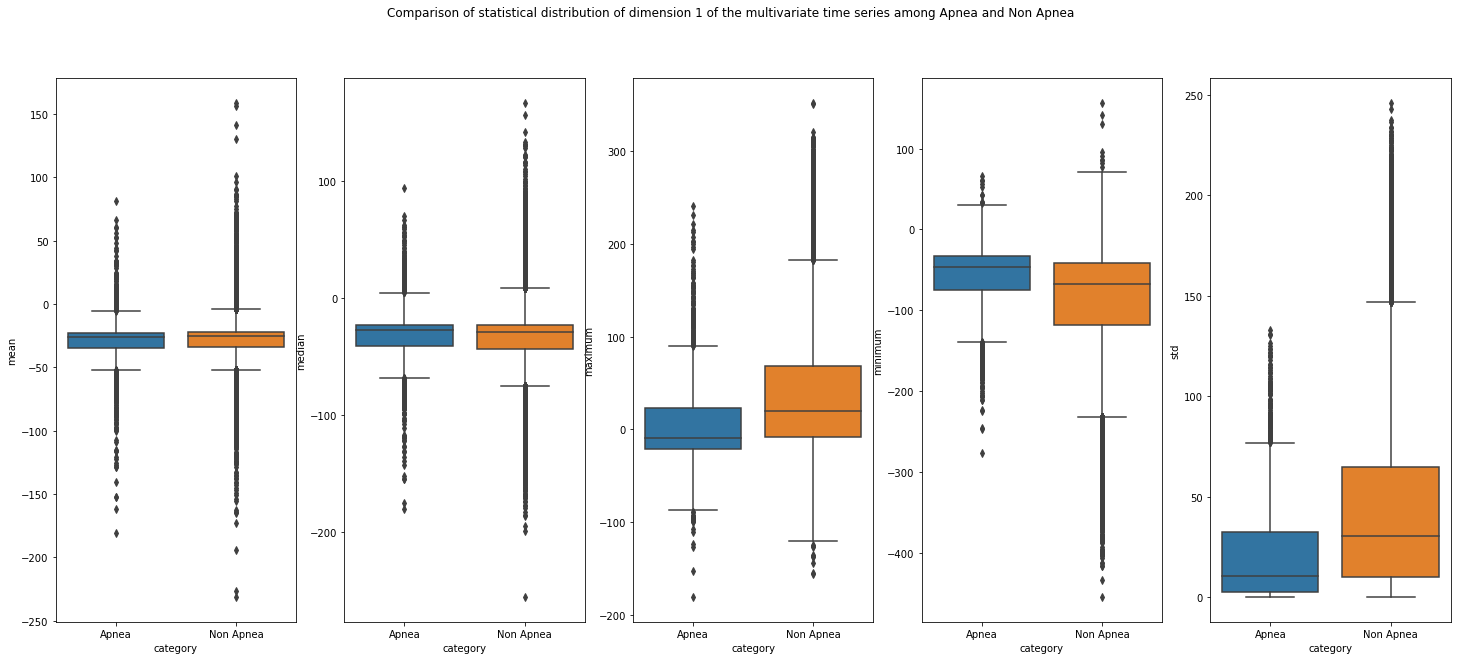


******************************
Study of dimension 2 of the multivariate time series


<ipython-input-127-f0e31c4849ee>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  apneas=np.array(apneas)
<ipython-input-127-f0e31c4849ee>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nonapneas=np.array(nonapneas)


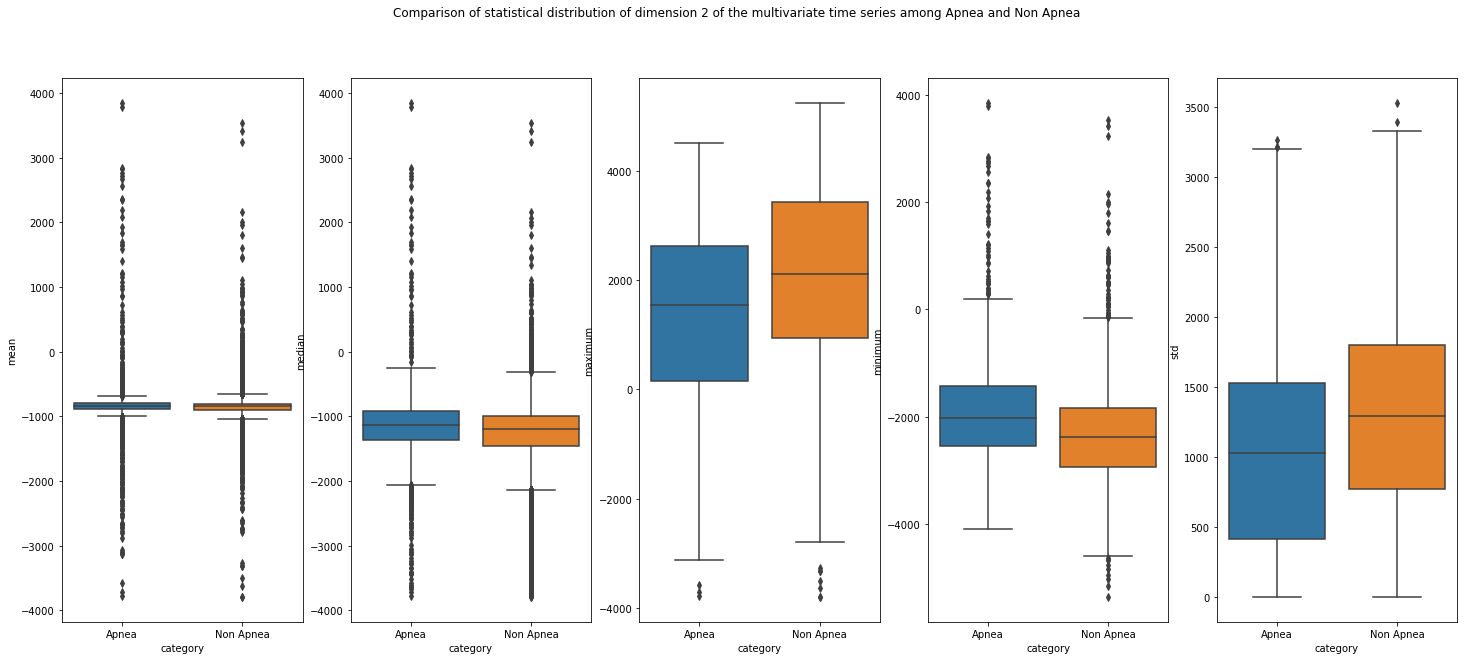


******************************
Study of dimension 3 of the multivariate time series


<ipython-input-127-f0e31c4849ee>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  apneas=np.array(apneas)
<ipython-input-127-f0e31c4849ee>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nonapneas=np.array(nonapneas)


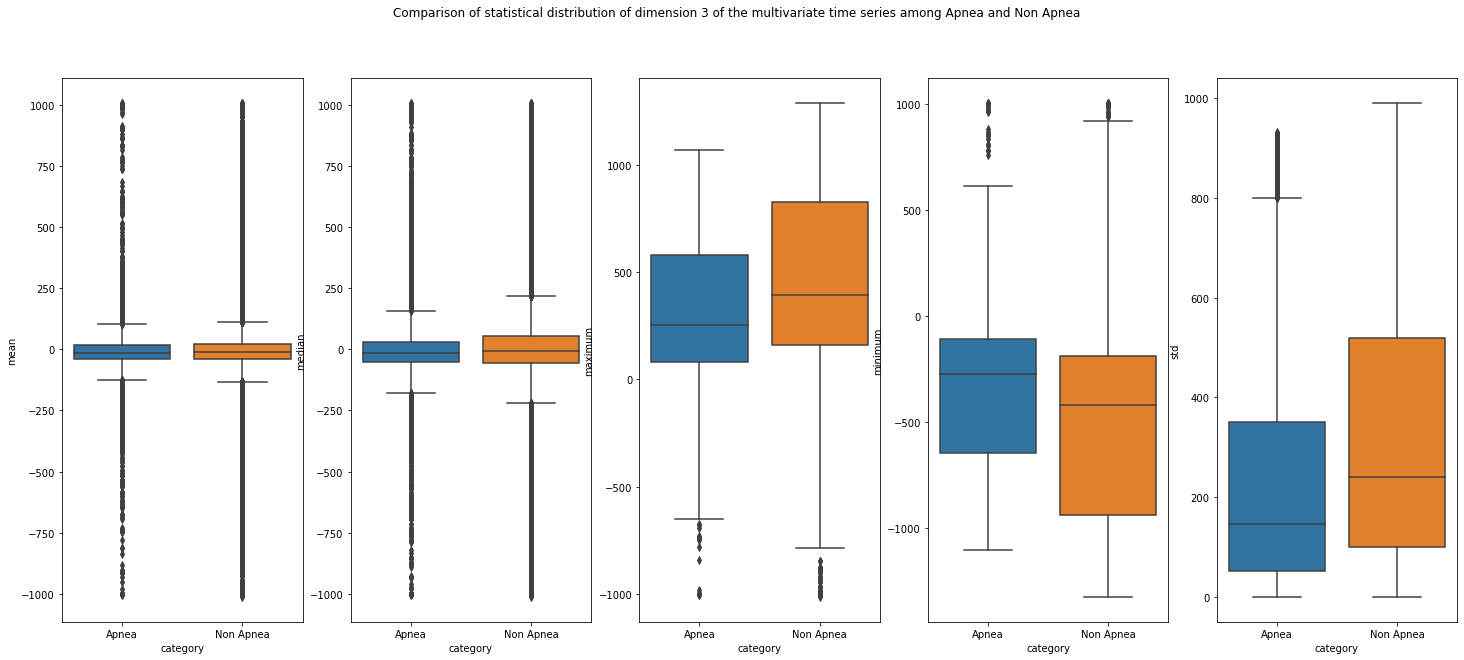


******************************
Study of dimension 4 of the multivariate time series


<ipython-input-127-f0e31c4849ee>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  apneas=np.array(apneas)
<ipython-input-127-f0e31c4849ee>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nonapneas=np.array(nonapneas)


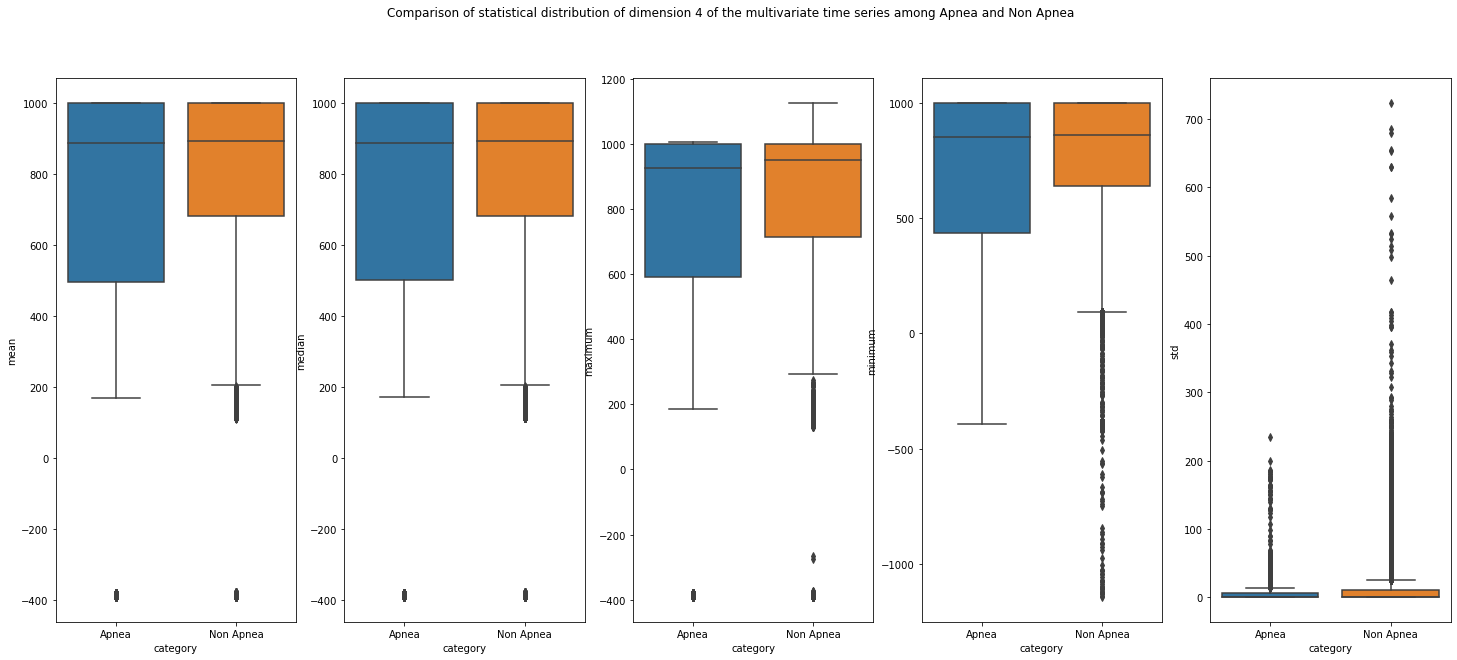


******************************
Study of dimension 5 of the multivariate time series


<ipython-input-127-f0e31c4849ee>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  apneas=np.array(apneas)
<ipython-input-127-f0e31c4849ee>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nonapneas=np.array(nonapneas)


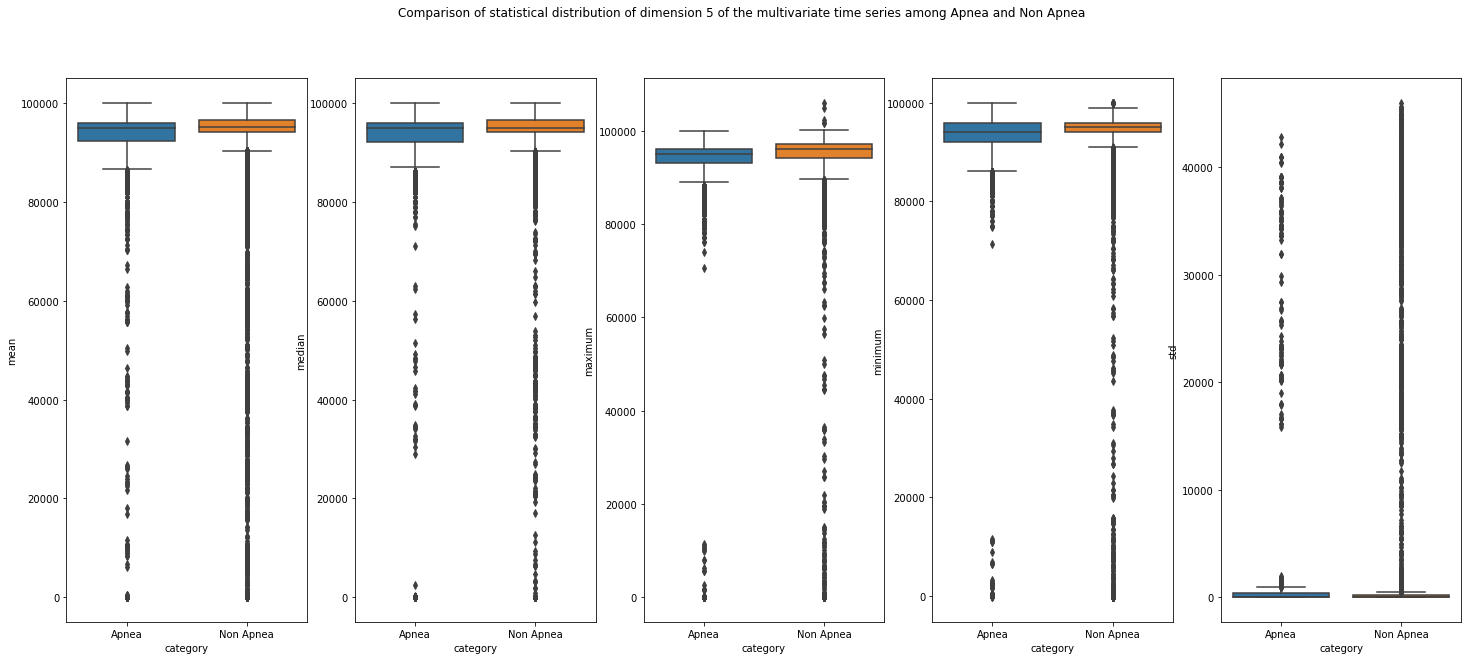


******************************
Study of dimension 6 of the multivariate time series


<ipython-input-127-f0e31c4849ee>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  apneas=np.array(apneas)
<ipython-input-127-f0e31c4849ee>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nonapneas=np.array(nonapneas)


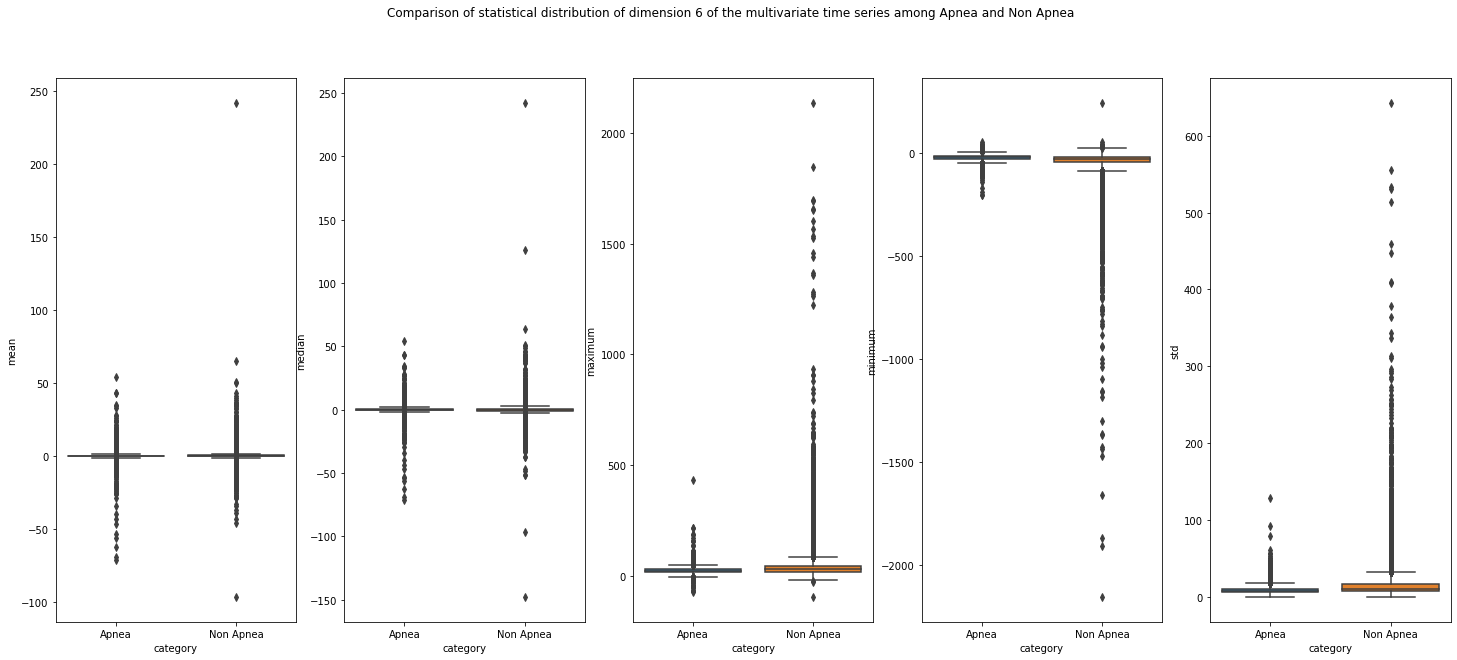


******************************
Study of dimension 7 of the multivariate time series


<ipython-input-127-f0e31c4849ee>:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  apneas=np.array(apneas)
<ipython-input-127-f0e31c4849ee>:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nonapneas=np.array(nonapneas)


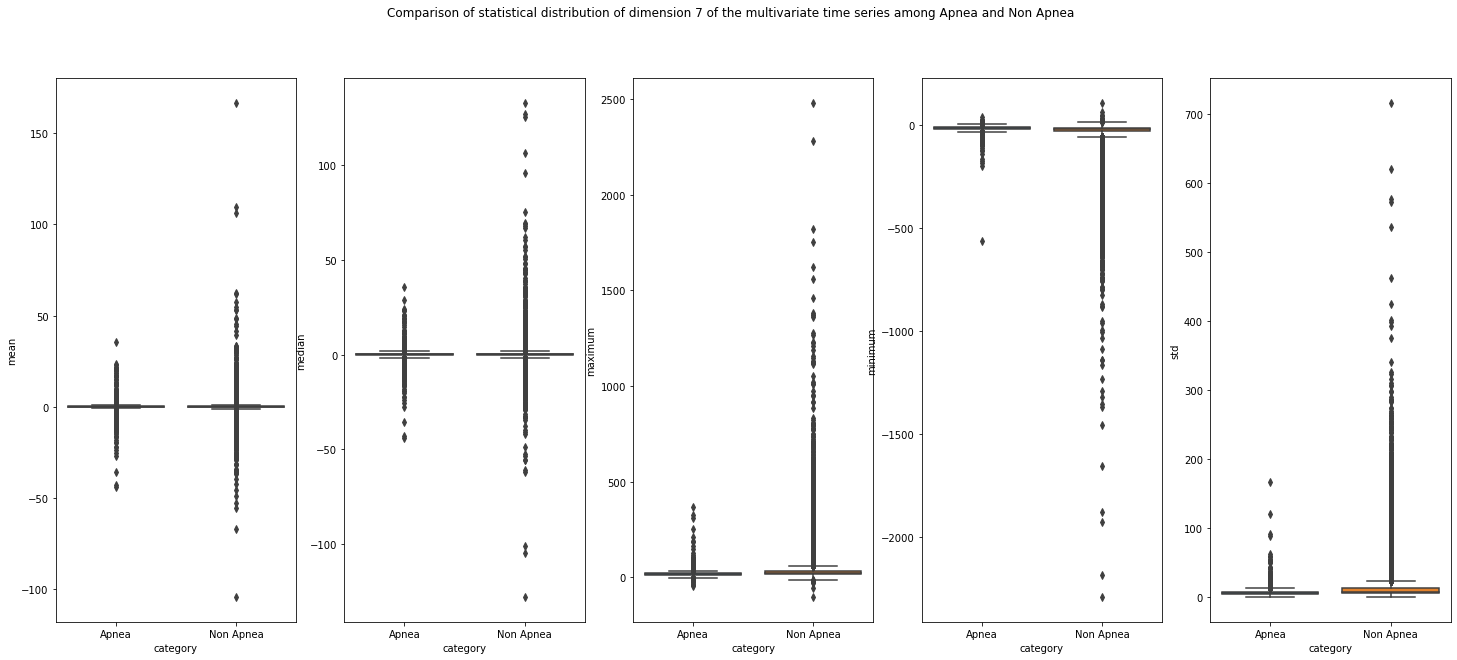

In [128]:
for i in range(NB_DIMENSIONS):
    print(30* "*")
    print("Study of dimension "+str(i)+" of the multivariate time series")
    X_train_i = np.load('data/train_dimension_'+str(i)+'.npy')
    features_boxplots(X_train_i, i)
    print("")

* Example with first dimension :

In [ ]:
X_train_0 = np.load('train_dimension_0.npy')

In [82]:
X_apnea = list()
for a,b,c in apnea_events: 
    a,b,c = int(a), int(b), int(c)
    X_apnea.append(X_train_0[a, b*FREQUENCY:(b+c)*FREQUENCY+1])
    
X_nonapnea = list()
for a,b,c in nonapnea_events: 
    a,b,c = int(a), int(b), int(c)
    X_nonapnea.append(X_train_0[a, b*FREQUENCY:(b+c)*FREQUENCY+1])

In [83]:
apneas = list()
for i in range(len(X_apnea)):
    for j in range(len(X_apnea[i])):
        if j%WINDOW_SIZE ==0:
            apneas.append(X_apnea[i][j:j+WINDOW_SIZE])
apneas=np.array(apneas)

nonapneas = list()
for i in range(len(X_nonapnea)):
    for j in range(len(X_nonapnea[i])):
        if j%WINDOW_SIZE ==0:
            nonapneas.append(X_nonapnea[i][j:j+WINDOW_SIZE])
nonapneas=np.array(nonapneas)

<ipython-input-83-55875e81e989>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  apneas=np.array(apneas)
<ipython-input-83-55875e81e989>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  nonapneas=np.array(nonapneas)


In [92]:
total_size = np.shape(apneas)[0] + np.shape(nonapneas)[0]
category = list()
mean, median, std, maxi, mini = np.zeros(total_size), np.zeros(total_size), np.zeros(total_size),np.zeros(total_size), np.zeros(total_size)
i=0
for signal in apneas:
    signal = np.array(signal)
    #signal= (signal-min(signal))/(max(signal) - min(signal)) ## normalize
    features = get_distribution_features(signal)
    mean[i] = features["mean"]
    maxi[i] = features["max"]
    mini[i] = features["min"]
    std[i] = features["std"]
    median[i] = features["two_quarter"]
    category.append('Apnea')
    
    i+=1
    
for signal in nonapneas:
    signal = np.array(signal)
    #signal= (signal-min(signal))/(max(signal) - min(signal)) ## normalize
    features = get_distribution_features(signal)
    mean[i] = features["mean"]
    maxi[i] = features["max"]
    mini[i] = features["min"]
    std[i] = features["std"]
    median[i] = features["two_quarter"]
    category.append('Non Apnea')
    i+=1
    
category = np.array(category)

In [93]:
d = {'mean': mean, 'median':median,'maximum' : maxi, 'minimum': mini, 'std': std, 'category':category}
df_train = pd.DataFrame(data=d)

Text(0.5, 1.0, 'Mean of dimension 0 over windows of 5 seconds between two categories')

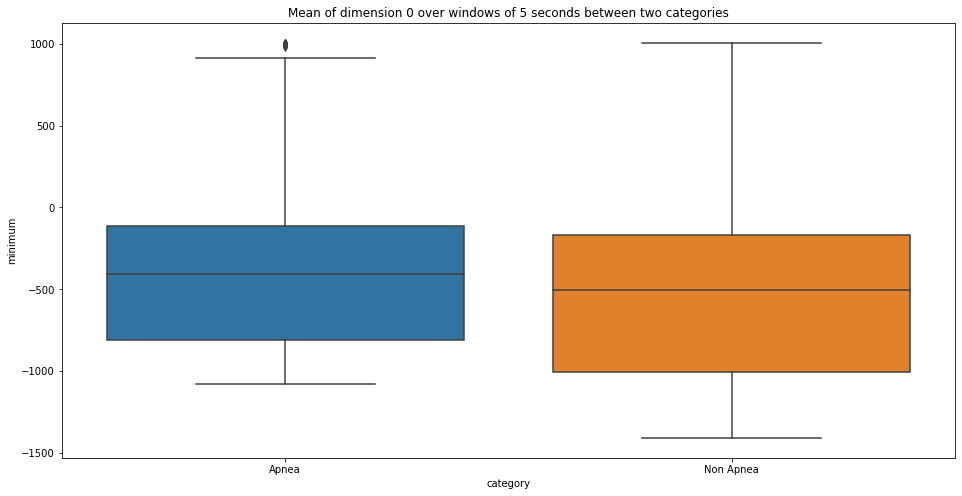

In [99]:
sns.boxplot(y='minimum', x='category', data=df_train)
plt.title("Mean of dimension 0 over windows of 5 seconds between two categories")

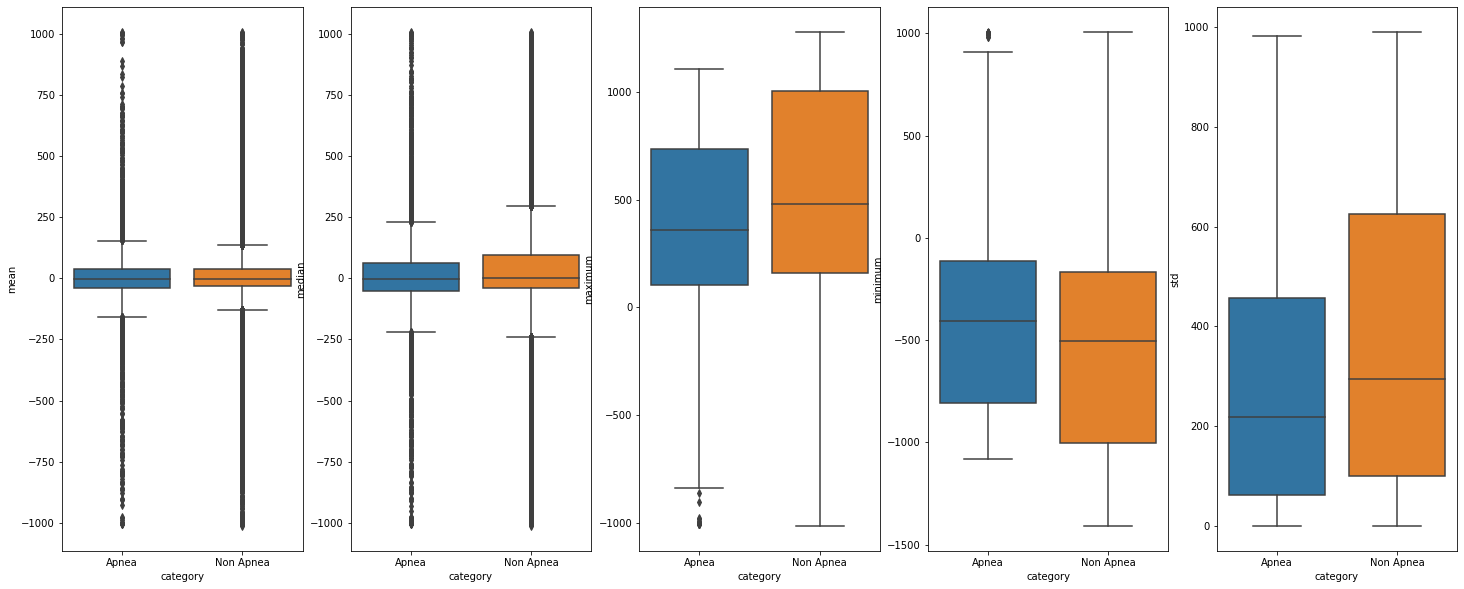

In [121]:
## plots
fig, axes = plt.subplots(1,len(df_train.columns[:-1]), figsize=(25, 10))
#fig.suptitle('Comparison of statistical distribution of dimension '+ str(???????) +'among Apnea and Non Apnea')
c=0
for col in df_train.columns[:-1]:

    sns.boxplot(ax = axes[c], y=col, x='category', data=df_train)
    c+=1